In [469]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [470]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [471]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [472]:
def file_get_contents(filename):
    with open(filename) as f:
        return f.read()

In [473]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import json
import re

#file_analyse_name = "ALEXIS PEDRÃO_260001087378"
#file_analyse_name = "MÁRCIO MACEDO_260000958767"
#file_analyse_name = "ALMEIDA LIMA_260000935642"
#file_analyse_name = "DELEGADO PAULO MARCIO_260001037485"
#file_analyse_name = "GEORLIZE_260000835177"
#file_analyse_name = "GILVANI SANTOS_260000935814"
#file_analyse_name = "JURACI NUNES_260000743434"
file_analyse_name = "LÚCIO FLÁVIO_260000857748"
#file_analyse_name = "RODRIGO VALADARES_260001065879"

## Tf-idf com 0
#file_analyse_name = "EDVALDO_260000983413"
file_analyse_name = "DELEGADA DANIELLE_260000637328"

#file_analyse_name = "EDVALDO_260000983413"
file_json_contents = file_get_contents("./files_parseds/" + file_analyse_name + ".json")
json_data = json.loads(file_json_contents)
content_pages = [re.sub(r'[0-9]', '', content["text"]) for content in json_data["content"]]

In [474]:
stop_words = ["aracaju","de","a","o","que","e","do","da","em","um","para","é", "etc","com","não","uma","os","no","se","na","por","mais","as","dos","como","mas","foi","ao","ele","das","tem","à","seu","sua","ou","ser","quando","muito","há","nos","já","está","eu","também","só","pelo","pela","até","isso","ela","entre","era","depois","sem","mesmo","aos","ter","seus","quem","nas","me","esse","eles","estão","você","tinha","foram","essa","num","nem","suas","meu","às","minha","têm","numa","pelos","elas","havia","seja","qual","será","nós","tenho","lhe","deles","essas","esses","pelas","este","fosse","dele","tu","te","vocês","vos","lhes","meus","minhas","teu","tua","teus","tuas","nosso","nossa","nossos","nossas","dela","delas","esta","estes","estas","aquele","aquela","aqueles","aquelas","isto","aquilo","estou","está","estamos","estão","estive","esteve","estivemos","estiveram","estava","estávamos","estavam","estivera","estivéramos","esteja","estejamos","estejam","estivesse","estivéssemos","estivessem","estiver","estivermos","estiverem","hei","há","havemos","hão","houve","houvemos","houveram","houvera","houvéramos","haja","hajamos","hajam","houvesse","houvéssemos","houvessem","houver","houvermos","houverem","houverei","houverá","houveremos","houverão","houveria","houveríamos","houveriam","sou","somos","são","era","éramos","eram","fui","foi","fomos","foram","fora","fôramos","seja","sejamos","sejam","fosse","fôssemos","fossem","for","formos","forem","serei","será","seremos","serão","seria","seríamos","seriam","tenho","tem","temos","tém","tinha","tínhamos","tinham","tive","teve","tivemos","tiveram","tivera","tivéramos","tenha","tenhamos","tenham","tivesse","tivéssemos","tivessem","tiver","tivermos","tiverem","terei","terá","teremos","terão","teria","teríamos","teriam"]
tfIdfVectorizer=TfidfVectorizer(
    max_df=0.8,
    min_df=0.2,
    stop_words=stop_words,
    use_idf=True,
    ngram_range=(1,2),
    #max_features=100
)
tfIdf = tfIdfVectorizer.fit_transform(content_pages)

In [475]:
# Analisar este caso para a exibição dos idfs 0
df = []
top_ten_sentences_per_page = []

for tf in tfIdf:
  frame = pd.DataFrame(tf.T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
  frame = frame.sort_values('TF-IDF', ascending=False)
  top_ten_sentences = frame.head(10)
  top_ten = pd.DataFrame()
  top_ten['Sentence'] = top_ten_sentences.index
  top_ten['TF-IDF'] = top_ten_sentences['TF-IDF'].tolist()
  top_ten_sentences_per_page.append(top_ten)
  df.append(frame)

print(len(top_ten_sentences_per_page))
print(top_ten_sentences_per_page)

64
[               Sentence  TF-IDF
0                cidade     0.0
1          compromissos     0.0
2  compromissos priorit     0.0
3       desenvolvimento     0.0
4            diretrizes     0.0
5                gestão     0.0
6           implantação     0.0
7         implementação     0.0
8             municipal     0.0
9             população     0.0,                Sentence  TF-IDF
0                 saúde     1.0
1                cidade     0.0
2          compromissos     0.0
3  compromissos priorit     0.0
4       desenvolvimento     0.0
5            diretrizes     0.0
6                gestão     0.0
7           implantação     0.0
8         implementação     0.0
9             municipal     0.0,                Sentence    TF-IDF
0                cidade  0.732992
1                 saúde  0.487109
2             população  0.474813
3          compromissos  0.000000
4  compromissos priorit  0.000000
5       desenvolvimento  0.000000
6            diretrizes  0.000000
7                g

/home/nathanfeitoza/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/nathanfeitoza/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/nathanfeitoza/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/nathanfeitoza/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: 

In [476]:
sentences_tfidf_no_zero_dictionary = {}
text_database = []

for df_word in df:
    for sentence, row in df_word.iterrows():
        text_instance = {}
        text_instance['sentence'] = sentence
        text_instance['tf-idf'] = row["TF-IDF"]

        if row["TF-IDF"] > 0:
            sentences_tfidf_no_zero_dictionary[sentence] = row["TF-IDF"]
        text_database.append(text_instance)

#print(sentences_tfidf_no_zero_dictionary)
#print(text_database)

In [477]:
tfIdf.shape

(64, 16)

In [478]:
dataframe_texts =  pd.DataFrame(text_database)
dataframe_texts

,sentence,tf-idf
0,cidade,0.0
1,compromissos,0.0
2,compromissos priorit,0.0
3,desenvolvimento,0.0
4,diretrizes,0.0
...,...,...
1019,priorit ários,0.0
1020,programa,0.0
1021,saúde,0.0
1022,serviços,0.0


In [479]:
# Imports necessários
from sklearn.cluster import KMeans
from sklearn import metrics

# Variando o número de k de 1 a 10 para analisar os valores da métrica
best_k_with_score = 5
best_score = 0.3

for k in range(2, 10):
  km = KMeans(n_clusters=k,random_state=42)
  km.fit(tfIdf)
  score = metrics.silhouette_score(tfIdf, km.labels_, metric='euclidean')
  if score > best_score:
    best_score = score
    best_k_with_score = k
  print("Para k=%i o valor Silhoutte foi de %.4f" % (k, score))

print("Melhor score: %.4f, então o k deve ser de %i" % (best_score, best_k_with_score))

Para k=2 o valor Silhoutte foi de 0.2163
Para k=3 o valor Silhoutte foi de 0.2193
Para k=4 o valor Silhoutte foi de 0.2533
Para k=5 o valor Silhoutte foi de 0.2455
Para k=6 o valor Silhoutte foi de 0.2610
Para k=7 o valor Silhoutte foi de 0.2724
Para k=8 o valor Silhoutte foi de 0.2785
Para k=9 o valor Silhoutte foi de 0.2979
Melhor score: 0.3000, então o k deve ser de 5


In [480]:
km = KMeans(n_clusters=best_k_with_score,random_state=42)
clusters_km = km.fit_predict(tfIdf)
clusters_km

array([0, 4, 1, 0, 0, 3, 2, 2, 3, 1, 2, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 1,
       1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 0, 2, 0, 1, 0, 1, 0, 4,
       3, 4, 0, 4, 3, 1, 4, 3, 0, 4, 3, 4, 4, 4, 4, 0, 3, 4, 0, 0],
      dtype=int32)

In [481]:
dataframe_texts['clusters_km'] = pd.Series(clusters_km)
dataframe_texts


,sentence,tf-idf,clusters_km
0,cidade,0.0,0.0
1,compromissos,0.0,4.0
2,compromissos priorit,0.0,1.0
3,desenvolvimento,0.0,0.0
4,diretrizes,0.0,0.0
...,...,...,...
1019,priorit ários,0.0,NaN
1020,programa,0.0,NaN
1021,saúde,0.0,NaN
1022,serviços,0.0,NaN


In [482]:
pages_in_clusters = {}
for i in range(0, len(clusters_km)):
  page = i + 1
  cluster = clusters_km[i]

  if cluster in pages_in_clusters:
    pages_in_clusters[cluster].append(page)
  else:
    pages_in_clusters[cluster] = [page] 
  

pages_in_clusters = dict(sorted(pages_in_clusters.items()))
pages_in_clusters

{0: [1, 4, 5, 15, 17, 19, 21, 24, 37, 39, 41, 43, 47, 53, 60, 63, 64],
 1: [3, 10, 22, 23, 25, 27, 29, 31, 33, 35, 36, 40, 42, 50],
 2: [7, 8, 11, 12, 14, 16, 18, 20, 38],
 3: [6, 9, 13, 26, 28, 30, 32, 34, 45, 49, 52, 55, 61],
 4: [2, 44, 46, 48, 51, 54, 56, 57, 58, 59, 62]}

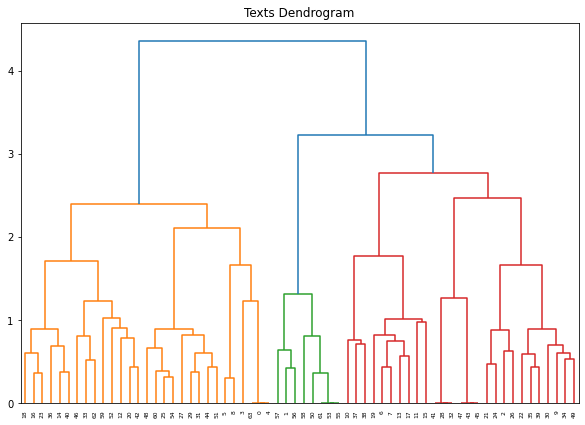

In [483]:
# Imports necessários
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Criando e plotando o dendrograma
plt.figure(figsize=(10, 7))
plt.title("Texts Dendrogram")
cluster_alg = shc.linkage(tfIdf.toarray(), method='ward',)
dend = shc.dendrogram(cluster_alg)


In [484]:
# Imports Necessários
from sklearn.cluster import AgglomerativeClustering

# Criação do Cluster
agg_cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
clusters_agg = agg_cluster.fit_predict(tfIdf.toarray())
clusters_agg

array([1, 5, 3, 1, 1, 1, 0, 0, 1, 3, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3,
       3, 2, 3, 6, 3, 6, 4, 6, 3, 6, 4, 2, 3, 3, 2, 0, 0, 3, 2, 4, 2, 4,
       6, 4, 2, 4, 6, 3, 5, 6, 2, 5, 6, 5, 5, 5, 5, 2, 6, 5, 2, 1])

In [485]:
dataframe_texts['cluster_agg'] = pd.Series(clusters_agg)
dataframe_texts

,sentence,tf-idf,clusters_km,cluster_agg
0,cidade,0.0,0.0,1.0
1,compromissos,0.0,4.0,5.0
2,compromissos priorit,0.0,1.0,3.0
3,desenvolvimento,0.0,0.0,1.0
4,diretrizes,0.0,0.0,1.0
...,...,...,...,...
1019,priorit ários,0.0,NaN,NaN
1020,programa,0.0,NaN,NaN
1021,saúde,0.0,NaN,NaN
1022,serviços,0.0,NaN,NaN


In [486]:
## Limpar valores NaN para 0

dataframe_texts = dataframe_texts.fillna(0)
dataframe_texts

,sentence,tf-idf,clusters_km,cluster_agg
0,cidade,0.0,0.0,1.0
1,compromissos,0.0,4.0,5.0
2,compromissos priorit,0.0,1.0,3.0
3,desenvolvimento,0.0,0.0,1.0
4,diretrizes,0.0,0.0,1.0
...,...,...,...,...
1019,priorit ários,0.0,0.0,0.0
1020,programa,0.0,0.0,0.0
1021,saúde,0.0,0.0,0.0
1022,serviços,0.0,0.0,0.0


In [487]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
order_centroids

array([[ 1, 15, 11, 10,  2,  6, 14,  3,  8,  0,  5, 12,  9,  7, 13,  4],
       [ 0,  3,  4,  9,  5, 13,  8, 14, 15, 12, 11, 10,  7,  6,  2,  1],
       [ 5,  4, 14,  9,  8,  3,  0, 13, 15, 12, 11, 10,  7,  6,  2,  1],
       [12,  7,  6, 15, 11, 10,  2,  1,  8,  0,  9,  5, 14, 13,  4,  3],
       [13,  4,  6,  8, 12,  7, 15, 11, 10,  2,  1,  0, 14,  5,  9,  3]])

In [488]:
# Criação de uma variável com a lista de palavras que representa as colunas da matriz.
terms = tfIdfVectorizer.get_feature_names_out()

In [489]:
terms

array(['cidade', 'compromissos', 'compromissos priorit',
       'desenvolvimento', 'diretrizes', 'gestão', 'implantação',
       'implementação', 'municipal', 'população', 'priorit',
       'priorit ários', 'programa', 'saúde', 'serviços', 'ários'],
      dtype=object)

In [490]:
centroids = []
# 5 foi o número de clusters que usamos para treinar o modelo do K-Means
for i in range(best_k_with_score):
  list_id = order_centroids[i]
  list_terms = [terms[id] for id in list_id[:10]]
  pages = [str(page) for page in pages_in_clusters[i]]
  centroids.append({'cluster': i, 'words': ', '.join(list_terms), 'pages': pages})

df_centroids = pd.DataFrame(centroids)
df_centroids

,cluster,words,pages
0,0,"compromissos, ários, priorit ários, priorit, c...","[1, 4, 5, 15, 17, 19, 21, 24, 37, 39, 41, 43, ..."
1,1,"cidade, desenvolvimento, diretrizes, população...","[3, 10, 22, 23, 25, 27, 29, 31, 33, 35, 36, 40..."
2,2,"gestão, diretrizes, serviços, população, munic...","[7, 8, 11, 12, 14, 16, 18, 20, 38]"
3,3,"programa, implementação, implantação, ários, p...","[6, 9, 13, 26, 28, 30, 32, 34, 45, 49, 52, 55,..."
4,4,"saúde, diretrizes, implantação, municipal, pro...","[2, 44, 46, 48, 51, 54, 56, 57, 58, 59, 62]"


In [491]:
import collections

top_words_by_plan = []
count = 0

for row in tfIdf.toarray():
  a = row
  b = tfIdfVectorizer.get_feature_names_out()

  dict_words = dict(zip(b, a))
  sorted_dict = sorted(dict_words.items(), key=lambda x: x[1], reverse=True)
  
  top_words_by_plan.append({'words': [w[0] for w in sorted_dict[:5]]})
  count += 1

In [492]:
# best_k_with_score define o número de clusters usados para treinar o cluster hierárquico
for i in range(best_k_with_score):
  all_cluster_i = dataframe_texts[dataframe_texts['cluster_agg']==i]
  print(i)
  print(all_cluster_i.index)
  all_plans_index = list(all_cluster_i.index)
  #cluster_words = [w for m in all_plans_index for w in top_words_by_plan[m]['words']]
  #word_count = sorted(dict(collections.Counter(cluster_words)).items(), key=lambda x: x[1], reverse=True)
  #print("Cluster %i: %s" % (i, [word[0] for word in word_count[:5]]))

  #for index, row in all_cluster_i.head(10).iterrows():
    #print("\tSentença: %s" % row['sentence'])
  #print()
  

0
Int64Index([   6,    7,   10,   11,   13,   15,   17,   19,   37,   38,
            ...
            1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023],
           dtype='int64', length=970)
1
Int64Index([0, 3, 4, 5, 8, 63], dtype='int64')
2
Int64Index([12, 14, 16, 18, 20, 23, 33, 36, 40, 42, 46, 52, 59, 62], dtype='int64')
3
Int64Index([2, 9, 21, 22, 24, 26, 30, 34, 35, 39, 49], dtype='int64')
4
Int64Index([28, 32, 41, 43, 45, 47], dtype='int64')


In [493]:
import json 

results_saves = []

for cluster_data in centroids:
  words = cluster_data['words']
  pages = cluster_data['pages']
  content = {'keywords': words, 'pages_relationeds': pages, 'data': []}

  for page_number in pages:
    page_index = int(page_number) - 1
    content['data'].append(content_pages[page_index])
  
  results_saves.append(content)


file = open("./files_analyseds/" + file_analyse_name + ".json", 'w')
file.write(json.dumps(results_saves))
file.close()

In [494]:
for n in range(best_k_with_score):
  print("Cluster %i: %s" % (n, list(df_centroids[df_centroids['cluster'] == n]['words'][:5])))
  data_selected = dataframe_texts[dataframe_texts['clusters_km'] == n]
  for index, row in data_selected.head(10).iterrows():
    print("sentence: %s" % row['sentence'])
  print()

Cluster 0: ['compromissos, ários, priorit ários, priorit, compromissos priorit, implantação, serviços, desenvolvimento, municipal, cidade']
sentence: cidade
sentence: desenvolvimento
sentence: diretrizes
sentence: serviços
sentence: saúde
sentence: compromissos
sentence: desenvolvimento
sentence: implantação
sentence: compromissos priorit
sentence: diretrizes

Cluster 1: ['cidade, desenvolvimento, diretrizes, população, gestão, saúde, municipal, serviços, ários, programa']
sentence: compromissos priorit
sentence: população
sentence: diretrizes
sentence: gestão
sentence: implementação
sentence: população
sentence: priorit ários
sentence: serviços
sentence: cidade
sentence: população

Cluster 2: ['gestão, diretrizes, serviços, população, municipal, desenvolvimento, cidade, saúde, ários, programa']
sentence: implantação
sentence: implementação
sentence: priorit
sentence: priorit ários
sentence: saúde
sentence: ários
sentence: cidade
sentence: compromissos priorit
sentence: desenvolvimento

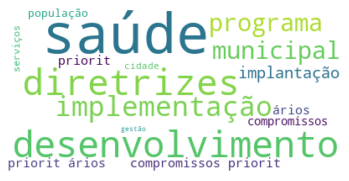

In [495]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

if len(sentences_tfidf_no_zero_dictionary) > 0:
  words_cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(sentences_tfidf_no_zero_dictionary)

  plt.imshow(words_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
else:
  print("Sem palavras com TF-IDF diferente de zero")